In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
import re
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid.inset_locator import inset_axes

In [18]:
files = ['ate323_control_npt_prod_rmsf.xvg',
'ate323_S54A_npt_prod_rmsf.xvg',
'oma366_control_npt_prod_rmsf.xvg',
'oma366_S54A_npt_prod_rmsf.xvg',
'per323_control_npt_prod_rmsf.xvg',
'per323_S54A_npt_prod_rmsf.xvg',
'tra366_control_npt_prod_rmsf.xvg',
'tra366_S54A_npt_prod_rmsf.xvg']

In [19]:
colors = cm.get_cmap('magma', 12)

In [20]:
#Raw data
mutations = ('S40D', 'S54A', 'A55D', 'D69Q', 'V71F', 'S54A', 'A55W', 'Y103F', 'S54A', 'S54A')
scores = np.concatenate((np.array([-1.27, 0.57, -0.83, -0.21, -0.36]), np.array([0.38, 0.52]), np.array([-0.71]), np.array([0.45]), np.array([0.47])))
antibodies = ["Pertuzumab"] * 5 + ["Atezolizumab"] * 2 + ["Daratumuab"] * 1 + ["Omalizumab"] * 1 + ["Trastzumab"] * 1

d = {'Antibody': antibodies, 'Mutation': mutations, 'Score': scores}
df = pd.DataFrame(data=d)

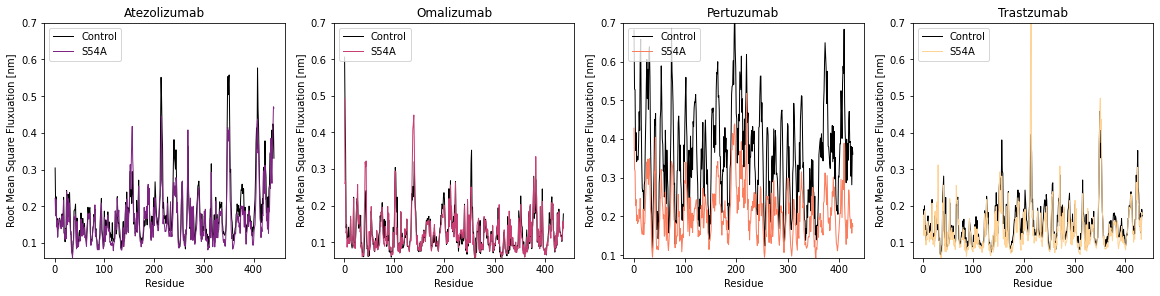

In [21]:
numFiles = len(files)
fig, ax = plt.subplots(1, int(numFiles/2), constrained_layout=True, squeeze=True)
fig.set_figheight(4)
fig.set_figwidth(int(numFiles/2)*4)
fileNum = 0

for c in files: 
    count = 0
    fileNum += 1
    section = c[0:-4]
    name = 'results/' + section + '_now.xvg'
    with open(name, 'r') as file:
        title = ""
        xyaxis_labels = list()
        data_x = list()
        data_y = list()

        for line in file:
            if line.find("@") != -1:

                # Extracts the title
                if re.match("title", line.split()[1]):
                    title = line.split()[2].strip('\"')

                # Extracts the legends for the axes
                if len(line.split()) > 3:
                    if re.match("label", line.split()[2]):
                        xyaxis_labels.append(line.split('"')[1])

            if not line.startswith("@") and not line.startswith("#"):
                                  count += 1
                                  data_x.append(count)
                                  data_y.append(float(line.split()[1]))

    mutation = ''
    val=c.index('_')
    antibody = c[:val]
    newC = c[val+1:]
    val2=newC.index('_')
    newC2 = newC[val2+1:]
    if newC2[0:8] != 'npt_prod':
        val3 = newC2.index('_')
        mutation = c[val+1:val+val2+val3+1+1]
    else:
        mutation = c[val+1:val+val2+1]

    if antibody == "ate323":
        antibody = "Atezolizumab"
        cVal = colors(2/6)
        xC = 0
        yC = 0
    elif antibody == "oma366":
        antibody = "Omalizumab"
        cVal = colors(3/6)
        xC = 0
        yC = 1
    elif antibody == "per323":
        antibody = "Pertuzumab"
        cVal = colors(4/6)
        xC = 0
        yC = 2
    elif antibody == "tra366":
        antibody = "Trastzumab"
        cVal = colors(5/6)
        xC = 0
        yC = 3
    elif antibody == "dar323":
        antibody = "Daratumuab"
        cVal = colors(5/12)
        xC = 0
        yC = 0
        numFiles = 0

    if "_" in mutation:
        unscInd = mutation.index('_')
        mutationFinal = mutation[:unscInd] + " & " + mutation[unscInd+1:]
    elif mutation == "control":
        mutationFinal = "Control"
    else: 
        mutationFinal = mutation

    name = antibody + ": " + mutationFinal

    #ax[yC].plot(data_x, data_y)
    if mutation == "control":
        ax[yC].plot(data_x[:-3], data_y[:-3], color = 'k', linewidth = 1, alpha = 1 ,label = mutationFinal)
    else: 
        ax[yC].plot(data_x[:-3], data_y[:-3], color = cVal, linewidth = 1, alpha = 1, label = mutationFinal, linestyle = '-')
    ax[yC].set_ylim([min(data_y),0.7])
    ax[yC].set_xlabel("Residue")
    ax[yC].set_ylabel("Root Mean Square Fluxuation [nm]")
    ax[yC].legend(loc="upper left")
    #ax[yC].set_xticks(np.arange(0,int(max(data_x))+20000,20000))
    #ax[yC].set_xticklabels(np.arange(0,int(max(data_x)/1000)+20,20), rotation=60)

    ax[yC].set_title(antibody)
    for x in range(len(df['Antibody'])):
        if df.loc[x]['Antibody'] == antibody and df.loc[x]['Mutation'] == mutationFinal: 
            ddg = '$\Delta$$\Delta$G = ' + str(df.loc[x]['Score'])
            #ax[yC].text(0, 0, ddg, fontsize=15)

# fig.show()
# saveName = 'pictures/all' + "_.jpg"
# plt.savefig(saveName)


In [22]:
files = ['ate323_control_npt_prod_rmsf.xvg',
'ate323_S54A_npt_prod_rmsf.xvg']

In [23]:
files = ['dar323_control_npt_prod_rmsf.xvg',
'dar323_Y103F_npt_prod_rmsf.xvg']

FileNotFoundError: [Errno 2] No such file or directory: 'results/dar323_control_npt_prod_rmsf_KGS.xvg'

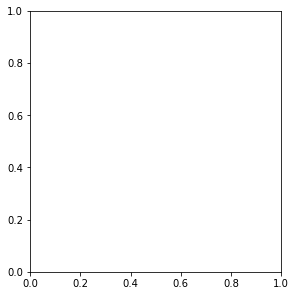

In [24]:
delta = []

numFiles = len(files)
fig, ax = plt.subplots(1, int(numFiles/2), constrained_layout=True, squeeze=True)
fig.set_figheight(4)
fig.set_figwidth(4)
fileNum = 0

for c in files: 
    count = 0
    fileNum += 1
    section = c[0:-4]
    name = 'results/' + section + '_KGS.xvg'
    with open(name, 'r') as file:
        title = ""
        xyaxis_labels = list()
        data_x = list()
        data_y = list()

        for line in file:
            if line.find("@") != -1:

                # Extracts the title
                if re.match("title", line.split()[1]):
                    title = line.split()[2].strip('\"')

                # Extracts the legends for the axes
                if len(line.split()) > 3:
                    if re.match("label", line.split()[2]):
                        xyaxis_labels.append(line.split('"')[1])

            if not line.startswith("@") and not line.startswith("#"):
                                  count += 1
                                  data_x.append(count)
                                  data_y.append(float(line.split()[1]))

    delta.append(data_y)
    
    mutation = ''
    val=c.index('_')
    antibody = c[:val]
    newC = c[val+1:]
    val2=newC.index('_')
    newC2 = newC[val2+1:]
    if newC2[0:8] != 'npt_prod':
        val3 = newC2.index('_')
        mutation = c[val+1:val+val2+val3+1+1]
    else:
        mutation = c[val+1:val+val2+1]

    if antibody == "ate323":
        antibody = "Atezolizumab"
        cVal = '#5E8941'
        xC = 0
        yC = 0
    elif antibody == "oma366":
        antibody = "Omalizumab"
        cVal = colors(3/6)
        xC = 0
        yC = 1
    elif antibody == "per323":
        antibody = "Pertuzumab"
        cVal = colors(4/6)
        xC = 0
        yC = 2
    elif antibody == "tra366":
        antibody = "Trastzumab"
        cVal = colors(5/6)
        xC = 0
        yC = 3
    elif antibody == "dar323":
        antibody = "Daratumumab"
        cVal = '#5A873C'
        xC = 0
        yC = 0
        numFiles = 0

    if "_" in mutation:
        unscInd = mutation.index('_')
        mutationFinal = mutation[:unscInd] + " & " + mutation[unscInd+1:]
    elif mutation == "control":
        if antibody == "Atezolizumab":
            mutationFinal = "A54"
        if antibody == "Daratumumab":
            mutationFinal = "F103"
    else: 
        mutationFinal = mutation
        if mutationFinal == "S54A":
            mutationFinal = "S54"
        if mutationFinal == "Y103F":
            mutationFinal = "Y103"

    name = antibody + ": " + mutationFinal

    #ax[yC].plot(data_x, data_y)
    if mutation == "control":
        ax.plot(data_x[:-3], data_y[:-3], color = 'k', linewidth = 1, alpha = 1 ,label = mutationFinal)
    else: 
        ax.plot(data_x[:-3], data_y[:-3], color = cVal, linewidth = 1, alpha = 1, label = mutationFinal, linestyle = '-')
    ax.set_ylim([min(data_y),0.5])
    ax.set_xlim(140,290)
    ax.set_xlabel("Residue Number")
    ax.set_ylabel("RMSF (nm)")
#     ax.legend(loc="upper left")
    #ax[yC].set_xticks(np.arange(0,int(max(data_x))+20000,20000))
    #ax[yC].set_xticklabels(np.arange(0,int(max(data_x)/1000)+20,20), rotation=60)

    ax.set_title(antibody)
    for x in range(len(df['Antibody'])):
        if df.loc[x]['Antibody'] == antibody and df.loc[x]['Mutation'] == mutationFinal: 
            ddg = '$\Delta$$\Delta$G = ' + str(df.loc[x]['Score'])
            #ax[yC].text(0, 0, ddg, fontsize=15)
            
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
# ax.text(0-(xmax-xmin)/4, ymax+(ymax-ymin)/8, 'D', color='black')

# fig.show()
# saveName = 'pictures/all' + "_.pdf"
# plt.savefig(saveName)
fig.savefig("plots3.pdf",bbox_inches='tight')

In [25]:
files = ['ate323_control_npt_prod_rmsf.xvg',
'ate323_S54A_npt_prod_rmsf.xvg']

In [129]:
files = ['dar323_control_npt_prod_rmsf.xvg',
'dar323_Y103F_npt_prod_rmsf.xvg']

sequence =     'EVQLLESGG GLVQPGGSLRLSCAVSGFTF    NSFAMSWVRQAPGKGLEWVSAISGS  GGGTYYADSVK GRFTISRDNSKNTLYLQMNSLRAEDTAVYFCAKDKILWFGEPVFDYWGQGTLVTVSSASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKRVEPK'
sequenceGaps = 'EVQLLESGG.GLVQPGGSLRLSCAVSGFTF....NSFAMSWVRQAPGKGLEWVSAISGS..GGGTYYADSVK.GRFTISRDNSKNTLYLQMNSLRAEDTAVYFCAKDKILWFGEPVFDYWGQGTLVTVSS'

In [27]:
files = ['oma366_control_npt_prod_rmsf.xvg',
'oma366_S54A_npt_prod_rmsf.xvg']

In [28]:
files = ['per323_control_npt_prod_rmsf.xvg',
'per323_S54A_npt_prod_rmsf.xvg']

In [29]:
files = ['tra366_control_npt_prod_rmsf.xvg',
'tra366_S54A_npt_prod_rmsf.xvg']

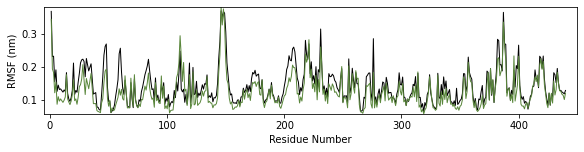

In [130]:
delta = []

numFiles = len(files)
fig, ax = plt.subplots(1, int(numFiles/2), constrained_layout=True, squeeze=True)
fig.set_figheight(2)
fig.set_figwidth(8)
fileNum = 0

for c in files: 
    count = 0
    xval = 0
    fileNum += 1
    section = c[0:-4]
    name = 'results/' + section + '_150.xvg'
    with open(name, 'r') as file:
        title = ""
        xyaxis_labels = list()
        data_x = list()
        data_x_pdb = list()
        data_y = list()

        for line in file:
            if line.find("@") != -1:

                # Extracts the title
                if re.match("title", line.split()[1]):
                    title = line.split()[2].strip('\"')

                # Extracts the legends for the axes
                if len(line.split()) > 3:
                    if re.match("label", line.split()[2]):
                        xyaxis_labels.append(line.split('"')[1])

            if not line.startswith("@") and not line.startswith("#"):
                xval += 1
                if count < len(sequenceGaps): 
                    s = sequenceGaps[count]
                    if "." in s:
                        xval += 1
                count += 1
                #data_x.append(count)
                #data_x.append(float(line.split()[0]))
                data_x.append(xval)
                data_x_pdb.append(int(line.split()[0]))
                data_y.append(float(line.split()[1]))

    delta.append(data_y)
    
    mutation = ''
    val=c.index('_')
    antibody = c[:val]
    newC = c[val+1:]
    val2=newC.index('_')
    newC2 = newC[val2+1:]
    if newC2[0:8] != 'npt_prod':
        val3 = newC2.index('_')
        mutation = c[val+1:val+val2+val3+1+1]
    else:
        mutation = c[val+1:val+val2+1]
        
    if antibody == "ate323":
        antibody = "Atezolizumab"
        cVal = '#5E8941'
        xC = 0
        yC = 0
    elif antibody == "oma366":
        antibody = "Omalizumab"
        cVal = '#99B486'
        xC = 0
        yC = 1
    elif antibody == "per323":
        antibody = "Pertuzumab"
        cVal = '#5E8941'
        xC = 0
        yC = 2
    elif antibody == "tra366":
        antibody = "Trastzumab"
        cVal = '#99B486'
        xC = 0
        yC = 3
    elif antibody == "dar323":
        antibody = "Daratumumab"
        cVal = '#5A873C'
        xC = 0
        yC = 0
        numFiles = 0

    if "_" in mutation:
        unscInd = mutation.index('_')
        mutationFinal = mutation[:unscInd] + " & " + mutation[unscInd+1:]
    elif mutation == "control":
        if antibody == "Atezolizumab" or antibody == "Omalizumab" or antibody == "Pertuzumab" or antibody == "Trastzumab":
            mutationFinal = "A54"
        if antibody == "Daratumumab":
            mutationFinal = "F103"
    else: 
        mutationFinal = mutation
        if mutationFinal == "S54A":
            mutationFinal = "S54"
        if mutationFinal == "Y103F":
            mutationFinal = "Y103"

    name = antibody + ": " + mutationFinal

    #ax[yC].plot(data_x, data_y)
    if mutation == "control":
        ax.plot(data_x[:-3], data_y[:-3], color = 'k', linewidth = 1, alpha = 1 ,label = mutationFinal)
    else: 
        ax.plot(data_x[:-3], data_y[:-3], color = cVal, linewidth = 1, alpha = 1, label = mutationFinal, linestyle = '-')
        #ax.plot(data_x[24:65], np.ones(len(data_x[24:65]))*0.4, color='r')
    ax.set_ylim([min(data_y),max(data_y)])
    ax.set_xlim(-5,450)
    ax.set_xlabel("Residue Number")
    ax.set_ylabel("RMSF (nm)")
#     ax.legend(loc="upper left")
    #ax[yC].set_xticks(np.arange(0,int(max(data_x))+20000,20000))
    #ax[yC].set_xticklabels(np.arange(0,int(max(data_x)/1000)+20,20), rotation=60)

    #ax.set_title(antibody)
    for x in range(len(df['Antibody'])):
        if df.loc[x]['Antibody'] == antibody and df.loc[x]['Mutation'] == mutationFinal: 
            ddg = '$\Delta$$\Delta$G = ' + str(df.loc[x]['Score'])
            #ax[yC].text(0, 0, ddg, fontsize=15)
            
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
# ax.text(0-(xmax-xmin)/4, ymax+(ymax-ymin)/8, 'D', color='black')

# fig.show()
# saveName = 'pictures/all' + "_.pdf"
# plt.savefig(saveName)
fig.savefig("plots3.pdf",bbox_inches='tight')

In [126]:
val = []
specialPoints = []

for x in range(len(delta[0])):
    val.append(-delta[0][x]+delta[1][x])
    if np.abs(-delta[0][x]+delta[1][x]) > 0.05:
        specialPoints.append(data_x_pdb[x])
        #print(delta[0][x]-delta[1][x])

In [127]:
specialPoints

[19,
 25,
 26,
 28,
 29,
 30,
 31,
 40,
 41,
 42,
 43,
 53,
 54,
 55,
 56,
 74,
 75,
 77,
 101,
 104,
 106,
 142,
 143,
 194,
 195,
 196,
 197,
 200,
 222,
 223,
 268,
 339,
 374,
 375,
 390,
 423,
 434]

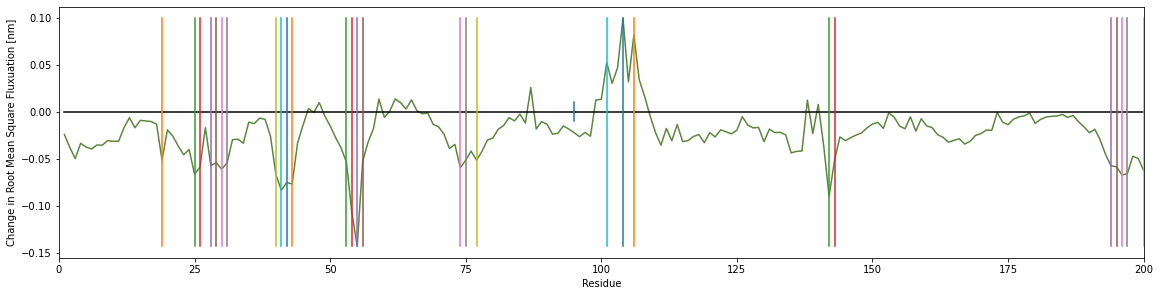

In [75]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, squeeze=True)
ax.plot(data_x, val, color = cVal)
ax.plot(data_x, np.zeros(len(data_x)), c = 'k')
ax.plot(np.ones(10)*95, np.linspace(-0.01,0.01,10))
for i in specialPoints: 
    ax.plot(np.ones(10)*(i), np.linspace(min(val),max(val),10))
ax.set_xlabel("Residue")
ax.set_ylabel("Change in Root Mean Square Fluxuation [nm]")
ax.set_xlim([0,200])

fig.set_figheight(4)
fig.set_figwidth(16)

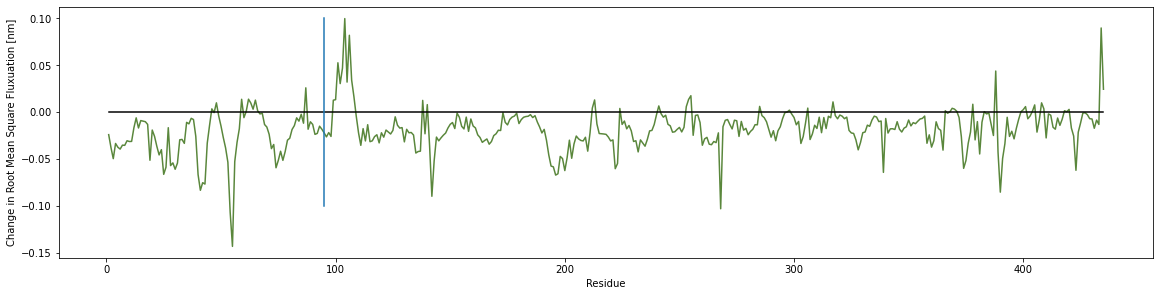

In [52]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, squeeze=True)
ax.plot(data_x, val, color = cVal)
ax.plot(data_x, np.zeros(len(data_x)), c = 'k')
ax.plot(np.ones(10)*95, np.linspace(-0.1,0.1,10))
ax.set_xlabel("Residue")
ax.set_ylabel("Change in Root Mean Square Fluxuation [nm]")

fig.set_figheight(4)
fig.set_figwidth(16)